In [2]:
import sys
sys.path.append('..')
from src.analysis.model_performances import *
from src.questions_construction.questions import *
import pandas as pd
EVERYTHING_POSTFIX = 'everything'
from helpers import *

In [3]:
questions_dir = f'{DATA_PATH}/questions_m1'
questions_by_id = gather_questions(questions_dir)
# sanity_checks()

ids_file_name = f'dataset_ids.test' #'small_questions_ids' #
if ids_file_name:
    selected_ids = open_jsonl(f'{DATA_PATH}/{ids_file_name}.jsonl')
    data_all, missing_data = gather_data(questions_by_id, selected_ids=selected_ids)
    save_main_dir = f'{STATISTICS_PATH}.{ids_file_name}'
else:
    data_all, missing_data = gather_data(questions_by_id)
    save_main_dir = STATISTICS_PATH

save_dir = os.path.join(save_main_dir, 'plots', 'by_fluents')
os.makedirs(save_dir, exist_ok=True)

Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_1
Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_2
Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_3
Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_4
Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_5
Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_6
Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_7
Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_8
Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_9
Missing questions, gemini, with_random_sub, with_ramifications, few_shot_1, blocksworld, Instance_10

In [12]:
model_name = 'gemini' #'gemma-2b-it'
prompt_type = 'few_shot_1'
question_category = ALL_QUESTION_CATEGORIES_KEY
# substitutions = WITHOUT_RANDOM_SUB
ramifications = WITH_RAMIFICATIONS
answer_type = TRUE_FALSE_ANSWER_TYPE

plan_length = 19
domain = ALL_DOMAINS_KEY

categories = list(FLUENT_TYPES_LIST)

score_type = ACCURACY_SCORE_KEY

# By ramifications

by ramifications, gemini, few shot 1, ALL DOMAINS, without random sub, pl-19


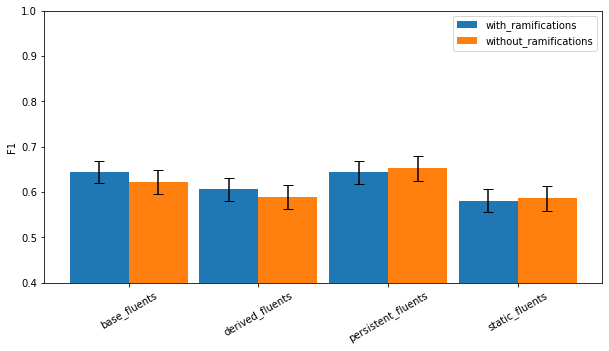

In [13]:
substitutions = WITHOUT_RANDOM_SUB
domain = ALL_DOMAINS_KEY


data_for_plot = []
for ramifications in RAMIFICATION_TYPES:
    data_for_plot_instance = {NAME_KEY: ramifications, DATA_KEY: [], ERROR_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
        data_for_plot_instance[DATA_KEY].append(stats.compute()['result'])
        data_for_plot_instance[ERROR_KEY].append(stats.compute()['result_other']['sem'])
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('F1')
plt.ylim([0.4,1])

save_name =  f'by_ramifications.{model_name}.{prompt_type}.{domain}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By question Categories

by question category, gemini, few shot 1, ALL DOMAINS, without ramifications, without random sub, pl-19


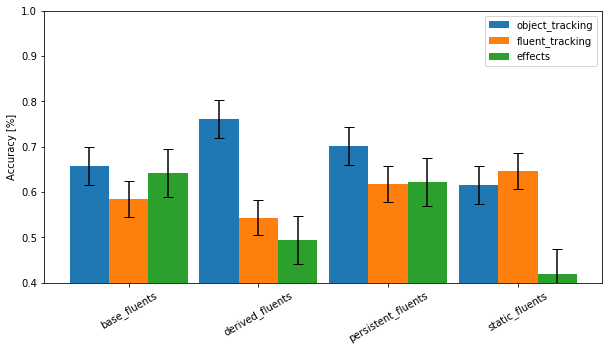

In [14]:
substitutions = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS

data_for_plot = []
for question_category in QUESTION_CATEGORIES:
    data_for_plot_instance = {NAME_KEY: question_category, DATA_KEY: [], ERROR_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type}), (OUT_OBJ_QUESTION_CATEGORY, {question_category})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
        out_obj = stats.compute()
        data_for_plot_instance[DATA_KEY].append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        data_for_plot_instance[ERROR_KEY].append(error)
    if data_for_plot_instance[DATA_KEY][0]:
        data_for_plot.append(data_for_plot_instance)

    
plt_n_bars(categories, data_for_plot)
plt.ylabel('Accuracy [%]')
plt.ylim([0.4,1])

save_name =  f'by_question_category.{model_name}.{prompt_type}.{domain}.{ramifications}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))


# By Length

In [15]:
# substitutions = WITHOUT_RANDOM_SUB
# ramifications = WITHOUT_RAMIFICATIONS
# 
# data_for_plot = []
# for plan_length in PLAN_LENGTHS:
#     data_for_plot_instance = {NAME_KEY: plan_length, DATA_KEY: [], ERROR_KEY: []}
#     for fluent_type in categories:
#         data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
#         stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions,score_type=score_type)
#         out_obj = stats.compute()
#         data_for_plot_instance[DATA_KEY].append(out_obj['result'])
#         if out_obj['result']:
#             error = out_obj['result_other']['sem']
#         else:
#             error = 0
#         data_for_plot_instance[ERROR_KEY].append(error)
#     if data_for_plot_instance[DATA_KEY][0]:
#         data_for_plot.append(data_for_plot_instance)
# 
#     
# plt_n_bars(categories, data_for_plot)
# plt.ylabel('Accuracy [%]')
# plt.ylim([0.4,1])
# 
# save_name = f'by_plan_length.{model_name}.{prompt_type}.{domain}.{ramifications}.{substitutions}.pl-{plan_length}'
# save_path = os.path.join(save_dir, f'{save_name}.pdf')
# plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
# print(save_name.replace('.',', ').replace('_',' '))

by plan length, gemini, few shot 1, ALL DOMAINS, without ramifications, without random sub, pl-19


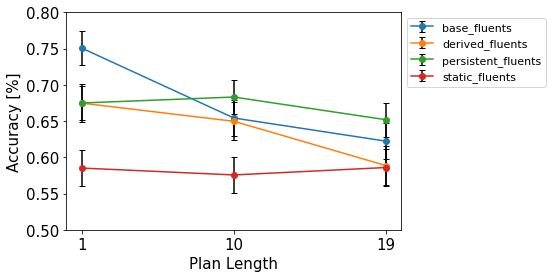

In [16]:
substitutions = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS

plan_lengths = [1, 10, 19]
y_by_fluent = {}
for fluent_type in categories:
    y = []
    y_error = []
    for plan_length in plan_lengths:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions,score_type=score_type)
        out_obj = stats.compute()
        y.append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        y_error.append(error)
    y_by_fluent[domain] = y
    # plt.plot(plan_lengths, y, 'o-', label=fluent_type, yerr=y_error, capsize=5)
    plt.errorbar(plan_lengths, y, yerr=y_error, capsize=3, fmt="o-", label=fluent_type, ecolor = "black")


plt.ylim([0.50, 0.8])
plt.xticks(plan_lengths)
# plt.title(f'{model_name} {prompt_type} {subs} {ramifications}')
plt.legend(fontsize=11, bbox_to_anchor=(1, 1))
plt.xticks(size=15)
plt.xlabel('Plan Length', size=15)
plt.yticks(size=15)
plt.ylabel('Accuracy [%]', size=15)

save_name = f'by_plan_length.{model_name}.{prompt_type}.{domain}.{ramifications}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By Random Subs

by subs, gemini, few shot 1, ALL DOMAINS, pl-1


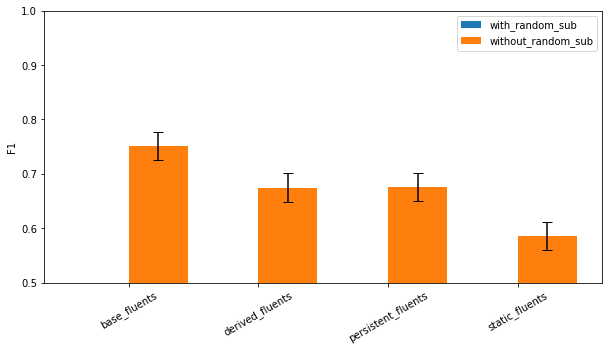

In [17]:
plan_length = 1 

data_for_plot = []
for substitutions in SUBSTITUTION_TYPES:
    data_for_plot_instance = {NAME_KEY: substitutions, DATA_KEY: [], ERROR_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
        out_obj = stats.compute()
        data_for_plot_instance[DATA_KEY].append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        data_for_plot_instance[ERROR_KEY].append(error)
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name =  f'by_subs.{model_name}.{prompt_type}.{domain}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By Domain Category

by domains, gemini, few shot 1, NON TRANSPORTATION, without random sub, pl-19


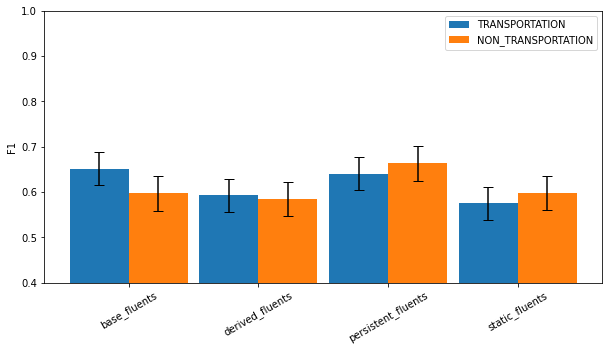

In [18]:
substitutions = WITHOUT_RANDOM_SUB
plan_length = 19


data_for_plot = []
for domain, domain_names in [(TRANSPORTATION_DOMAIN_KEY, TRANSPORTATION_DOMAINS), (NON_TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAINS)]:
    data_for_plot_instance = {NAME_KEY: domain, DATA_KEY: [], ERROR_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_DOMAIN_NAME, set(domain_names)), (OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
        out_obj = stats.compute()
        data_for_plot_instance[DATA_KEY].append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        data_for_plot_instance[ERROR_KEY].append(error)
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('F1')
plt.ylim([0.4,1])

save_name =  f'by_domains.{model_name}.{prompt_type}.{domain}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By positive and neg fluents

by pos neg, gemini, few shot 1, ALL DOMAINS, without random sub, without ramifications, pl-19


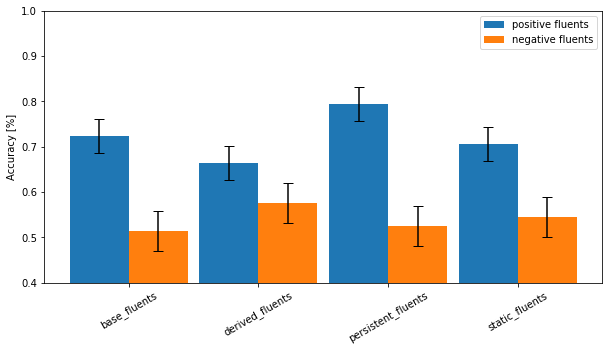

In [19]:
# small_dataset_ids.200.2.pl-1.new.jsonl# by_is_pos_fluent_question = {}
# for is_pos_fluent_question in [True, False, None]:
#     data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_IS_POS_FLUENT_QUESTION, {is_pos_fluent_question})])
#     stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions)
#     by_is_pos_fluent_question[is_pos_fluent_question] = stats.compute()['result']

substitutions = WITHOUT_RANDOM_SUB
domain = ALL_DOMAINS_KEY
ramifications = WITHOUT_RAMIFICATIONS
plan_length = 19

to_pretty = {True: 'positive fluents', False: 'negative fluents'}
data_for_plot = []
for is_pos_fluent_question in [True, False]:
    data_for_plot_instance = {NAME_KEY: to_pretty[is_pos_fluent_question], DATA_KEY: [], ERROR_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_IS_POS_FLUENT_QUESTION, {is_pos_fluent_question}), (OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
        out_obj = stats.compute()
        data_for_plot_instance[DATA_KEY].append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        data_for_plot_instance[ERROR_KEY].append(error)
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('Accuracy [%]')
plt.ylim([0.4,1])

save_name =  f'by_pos_neg.{model_name}.{prompt_type}.{domain}.{substitutions}.{ramifications}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))